In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [44]:
plt.rcParams['figure.figsize'] = [12, 5]

$$
p_{\xi}(x) = \begin{cases}
\frac{1}{2|x|^2}, & |x| \ge 1 \\
0, & |x| \le 1
\end{cases}
$$

$$
F_{\xi}(x) = \begin{cases}
-\frac{1}{2x}, & x < -1 \\
\frac12, & |x| \le 1 \\
1 - \frac{1}{2x}, & x > 1
\end{cases}
$$

$$
F^{-1}_{\xi}(y) = \begin{cases}
-\frac{1}{2y}, & 0 < y < \frac12 \\
\frac{1}{2(1-y)}, & \frac12 < y < 1
\end{cases}
$$



In [29]:
def apparently_symm_pareto():
    y = np.random.uniform(0, 1)
    return (-0.5 / y) if y < 0.5 else (0.5 / (1 - y))

In [57]:
def build_hist_symm_pareto(threshold=5.0):
    samples = np.fromiter((apparently_symm_pareto() for _ in range(5000)), float)
    print(f"removing {np.size(samples[np.abs(samples) >= threshold])} outliers from sampling")
    samples = samples[np.abs(samples) < threshold]
    plt.hist(samples, bins=50, alpha=0.5, density=True)

removing 992 outliers from sampling


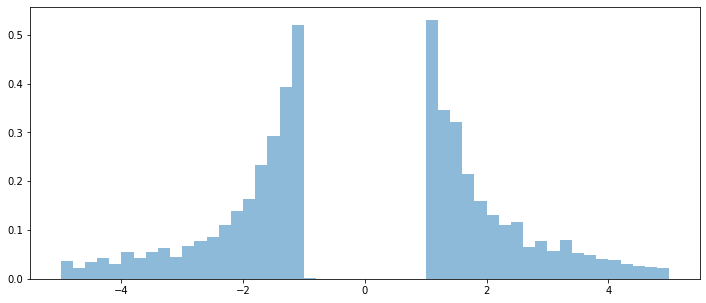

In [61]:
build_hist_symm_pareto()

In [30]:
def sum_of_pareto_distributions(N):
    return (2 / np.pi) * np.sum(np.fromiter((apparently_symm_pareto() for _ in range(N)), float)) / N

In [31]:
def cauchy_distribution_density(x):
    return (1 / np.pi) * (1 / (1 + x ** 2))

In [32]:
def build_hist_with_density(N, threshold=20.0):
    x_values = np.linspace(-threshold, threshold, 500)
    y_values = np.vectorize(cauchy_distribution_density)(x_values)
    plt.plot(x_values, y_values, color='red')

    samples = np.fromiter((sum_of_pareto_distributions(N) for _ in range(5000)), float)
    print(f"removing {np.size(samples[np.abs(samples) >= threshold])} outliers from sampling")
    samples = samples[np.abs(samples) < threshold]
    plt.hist(samples, bins=50, alpha=0.5, density=True)

    plt.show()

removing 1064 outliers from sampling


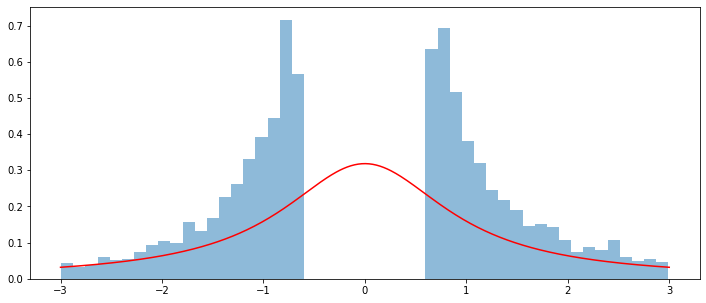

In [49]:
build_hist_with_density(N=1, threshold=3)

removing 139 outliers from sampling


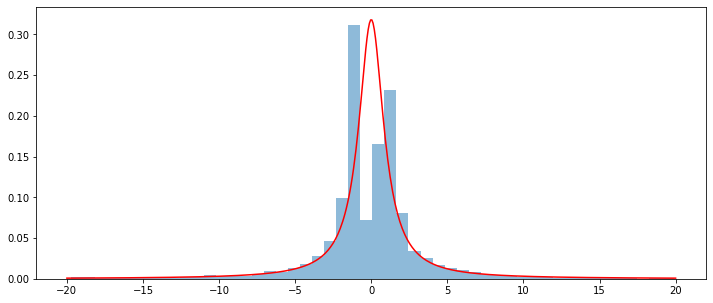

In [46]:
build_hist_with_density(N=1, threshold=20)

removing 175 outliers from sampling


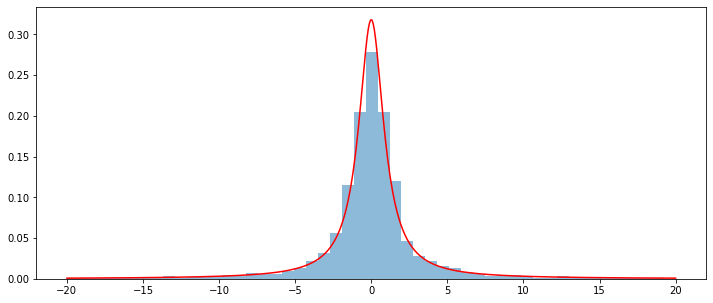

In [47]:
build_hist_with_density(N=3)

removing 154 outliers from sampling


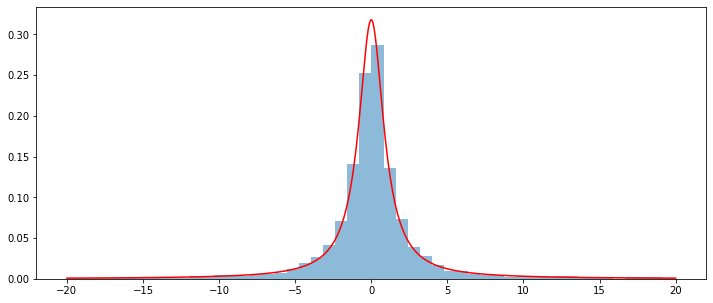

In [48]:
build_hist_with_density(N=10)